In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# Part 1

<img src = "Part1.png">

In [2]:
login_df = pd.read_json('logins.json')
login_df['count'] = 1
login_df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [3]:
login_df.set_index('login_time', inplace = True)
login_day = login_df.resample('15min').sum()
login_day.reset_index(inplace = True)
login_day.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [4]:
login_day['date'] = login_day.login_time.dt.date
login_day['time'] = login_day.login_time.dt.time
login_day['month'] = login_day.login_time.dt.month

login_day.head()

,login_time,count,date,time,month
0,1970-01-01 20:00:00,2,1970-01-01,20:00:00,1
1,1970-01-01 20:15:00,6,1970-01-01,20:15:00,1
2,1970-01-01 20:30:00,9,1970-01-01,20:30:00,1
3,1970-01-01 20:45:00,7,1970-01-01,20:45:00,1
4,1970-01-01 21:00:00,1,1970-01-01,21:00:00,1


In [5]:
df = login_day.groupby(['month','time']).agg({'count':'mean'}).reset_index().set_index('time')
df.head()

,month,count
time,,
00:00:00,1,10.433333
00:15:00,1,12.033333
00:30:00,1,11.300000
00:45:00,1,12.400000
01:00:00,1,11.433333


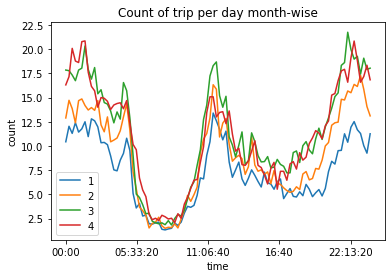

In [6]:
for i in df.month.unique():
    y = df[df.month==i]['count']
    y.plot(label = i)
plt.ylabel('count')
plt.title('Count of trip per day month-wise')
plt.legend()
plt.show()

The number of trips have slight increase through the months but the general trend seems to be the same.
There is a clear and understandable dip in number of trips in the early morning time.
There are two peaks in a day. Around Morning 11 and in late evening.

# Part 2

<img src = "Part2.png">

__Answers :__

1. Trips per week and revenue generated per hour could be a good measure. From business point of view revenue generated could be a compelling factor to convince drivers.

2. a. Pick x drivers with half group being local to one city and other open to all cities. And compare their revenue generated.
   
   b. ANOVA Test could be used as it compares categorical values(driver groups) and continuous values(revenue generated).
   
   c. Having a NULL hypothesis that both group generate same revenue. And alternative hypothesis that there is a difference. And we want to reject the NULL Hypothesis

# Part 3

<img src = 'Part3.png'>

## Data Wrangling

In [7]:
udc_df = pd.read_json('ultimate_data_challenge.json')
udc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [8]:
udc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
udc_df['last_trip_date'] = pd.to_datetime(udc_df['last_trip_date']) 
udc_df['signup_date'] = pd.to_datetime(udc_df['signup_date']) 

In [10]:
#NA Imputation

udc_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

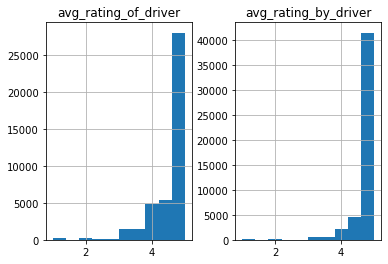

In [11]:
udc_df[['avg_rating_of_driver','avg_rating_by_driver']].hist()
plt.show()

In [12]:
#Medain as data is skwed
udc_df['avg_rating_of_driver'].fillna(value = udc_df['avg_rating_of_driver'].median(), inplace = True)
udc_df['avg_rating_by_driver'].fillna(value = udc_df['avg_rating_by_driver'].median(), inplace = True)

udc_df['phone'].fillna(value = udc_df['phone'].mode(), inplace = True)

In [13]:
#Dealing with Duplicates

udc_df[udc_df.duplicated()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
29601,Winterfell,1,2014-01-01,4.9,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0
34641,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0
36627,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0
39601,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0
42025,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0
45416,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0


In [14]:
udc_df.drop_duplicates(inplace = True)
udc_df[udc_df.duplicated()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver


## EDA

If you look closely, 'ultimate_black_user' can be our target variable.

In [15]:
x = udc_df['last_trip_date'] - udc_df['signup_date']
udc_df['cust_days'] = x.dt.components.days

In [16]:
continuous_var = ['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge','surge_pct','weekday_pct', 'avg_dist',
       'avg_rating_by_driver','cust_days']

cat_var = ['city','phone']

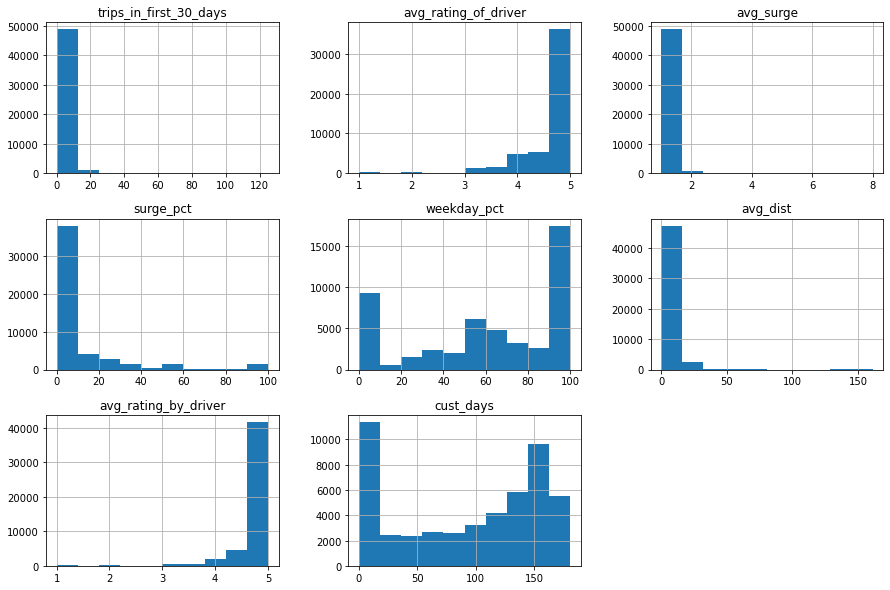

In [17]:
udc_df[continuous_var].hist(figsize = (15,10))
plt.show()

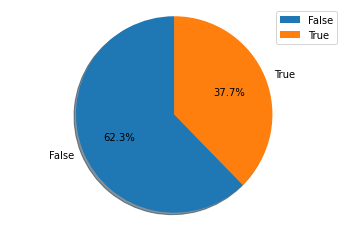

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie(list(udc_df.ultimate_black_user.value_counts()), labels= ['False','True'],autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.legend()
plt.show()

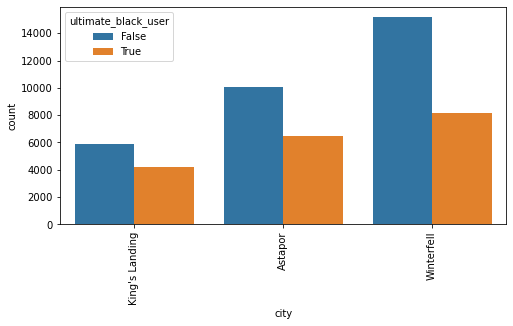

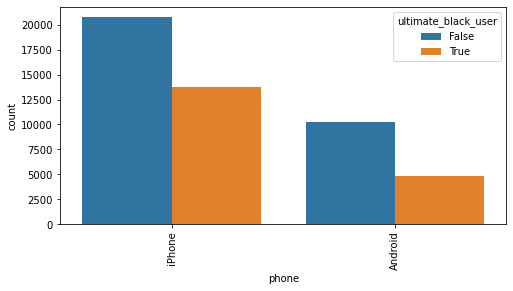

In [19]:
for i in cat_var:
    plt.figure(figsize=(8,4))
    sns.countplot(data = udc_df,hue = 'ultimate_black_user', x = i)
    plt.xticks(rotation=90)
    plt.show()

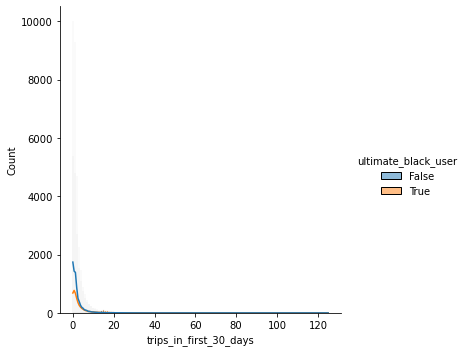

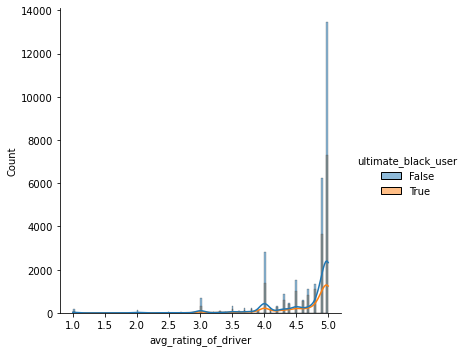

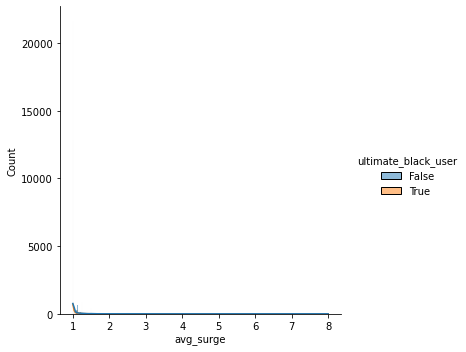

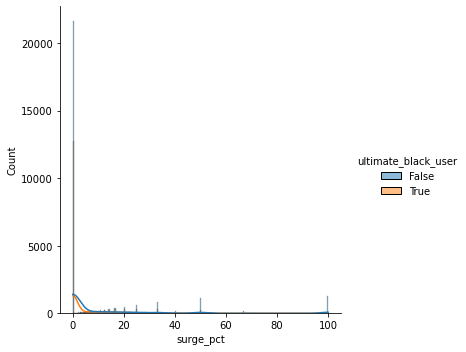

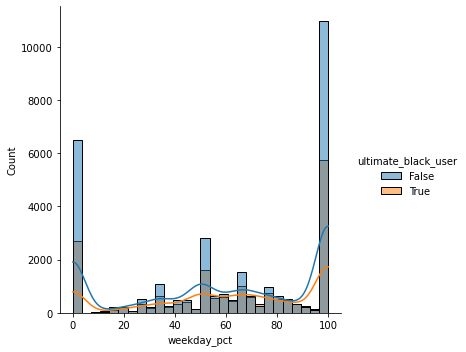

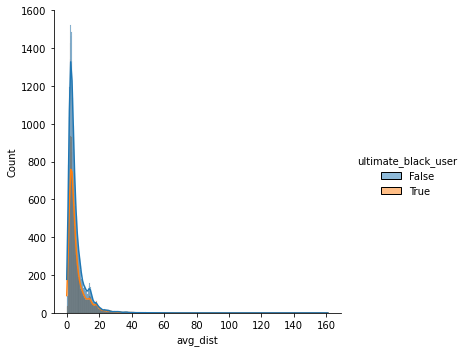

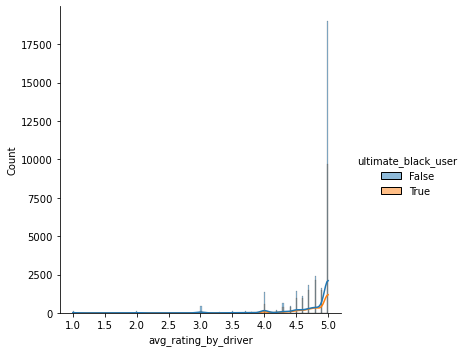

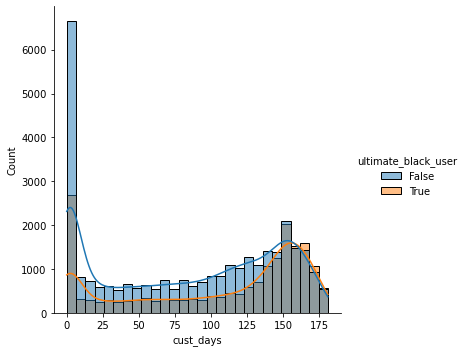

In [20]:
for j in continuous_var:
    sns.displot(data = udc_df,x = j,hue = 'ultimate_black_user', kde=True)
    plt.show()

In [21]:
df = udc_df[['signup_date']]
df['count'] = 1
df.set_index('signup_date', inplace = True)
df.head()

<ipython-input-21-6a9c3d783efd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


,count
signup_date,
2014-01-25,1
2014-01-29,1
2014-01-06,1
2014-01-10,1
2014-01-27,1


In [22]:
df_day = df.resample('D').sum()
df_day.head()

,count
signup_date,
2014-01-01,1736
2014-01-02,1004
2014-01-03,1213
2014-01-04,1485
2014-01-05,1343


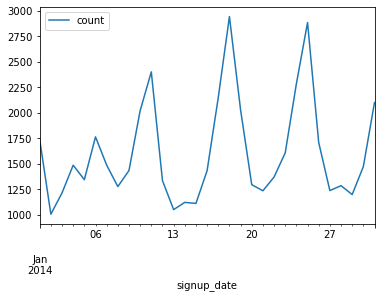

In [23]:
df_day.plot()
plt.show()

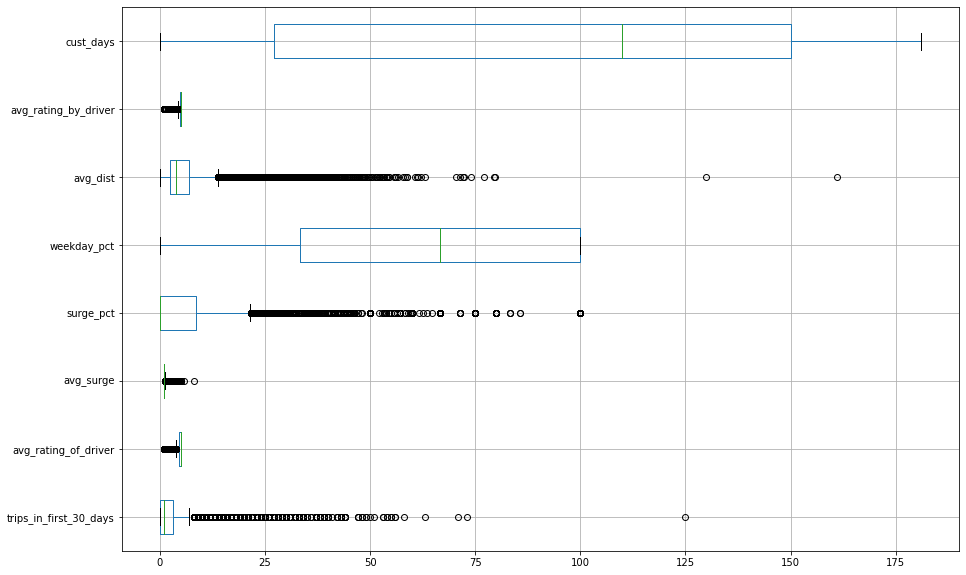

In [24]:
#Dealing with outliers

udc_df.boxplot(column = continuous_var, figsize = (15,10), vert=False)
plt.show()

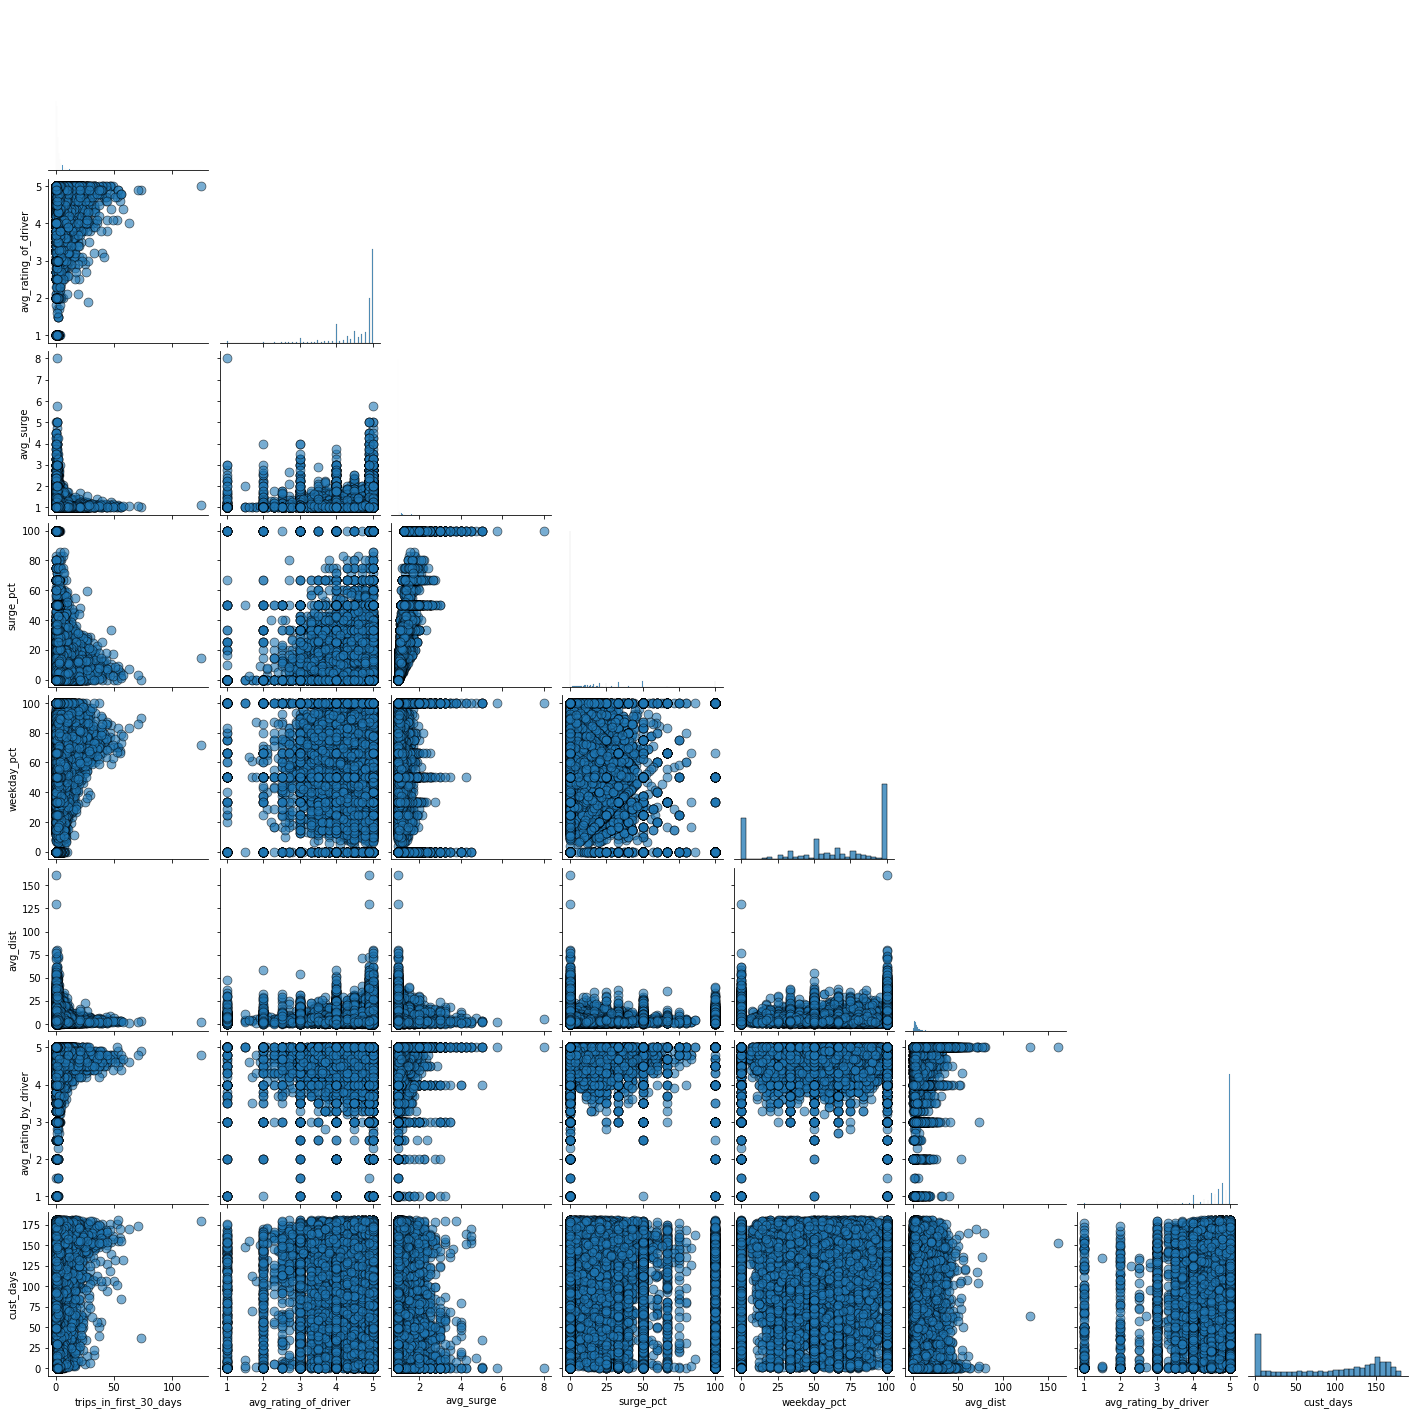

In [25]:
sns.pairplot(data = udc_df
            ,vars =  ['trips_in_first_30_days', 'avg_rating_of_driver','avg_surge','surge_pct','weekday_pct', 'avg_dist',
       'avg_rating_by_driver','cust_days']
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
                 ,corner=True)
plt.show()

In [26]:
for i in continuous_var:
    print(i ,udc_df[i].skew())

trips_in_first_30_days 5.167326688978298
avg_rating_of_driver -2.739672544088061
avg_surge 6.820830288531048
surge_pct 3.1438218651562124
weekday_pct -0.4779203897837433
avg_dist 3.4640931425063832
avg_rating_by_driver -4.13628497577653
cust_days -0.32413320961703185


In [27]:
from scipy import stats

for i in ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','avg_dist','avg_rating_by_driver']:
    udc_df[i] = stats.yeojohnson(udc_df[i])[0]
    print(i,':',udc_df[i].skew())

trips_in_first_30_days : 0.10499984211477607
avg_rating_of_driver : -0.7776127836866646
avg_surge : 0.0
avg_dist : 0.009210535947571142
avg_rating_by_driver : -0.8563356992774053


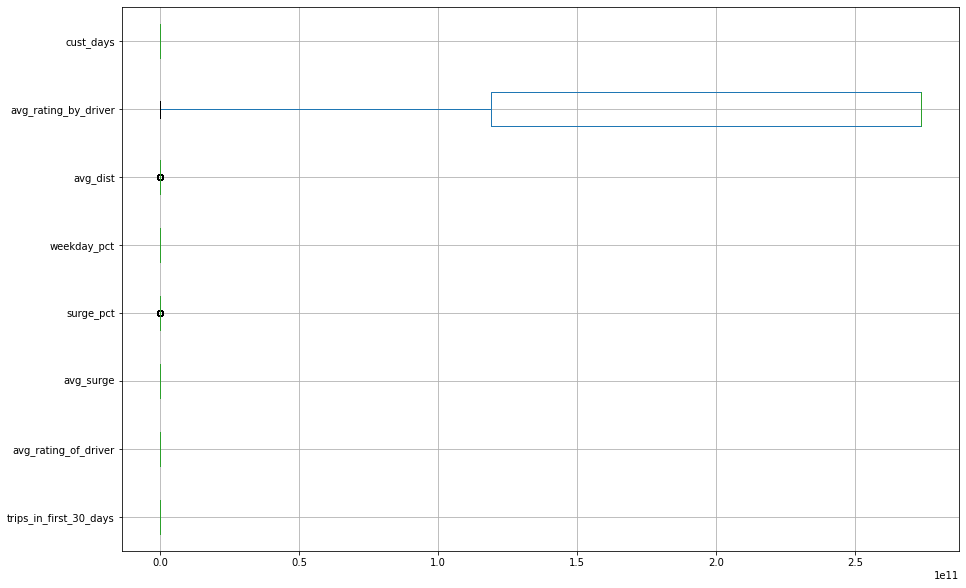

In [28]:
udc_df.boxplot(column = continuous_var, figsize = (15,10), vert=False)
plt.show()

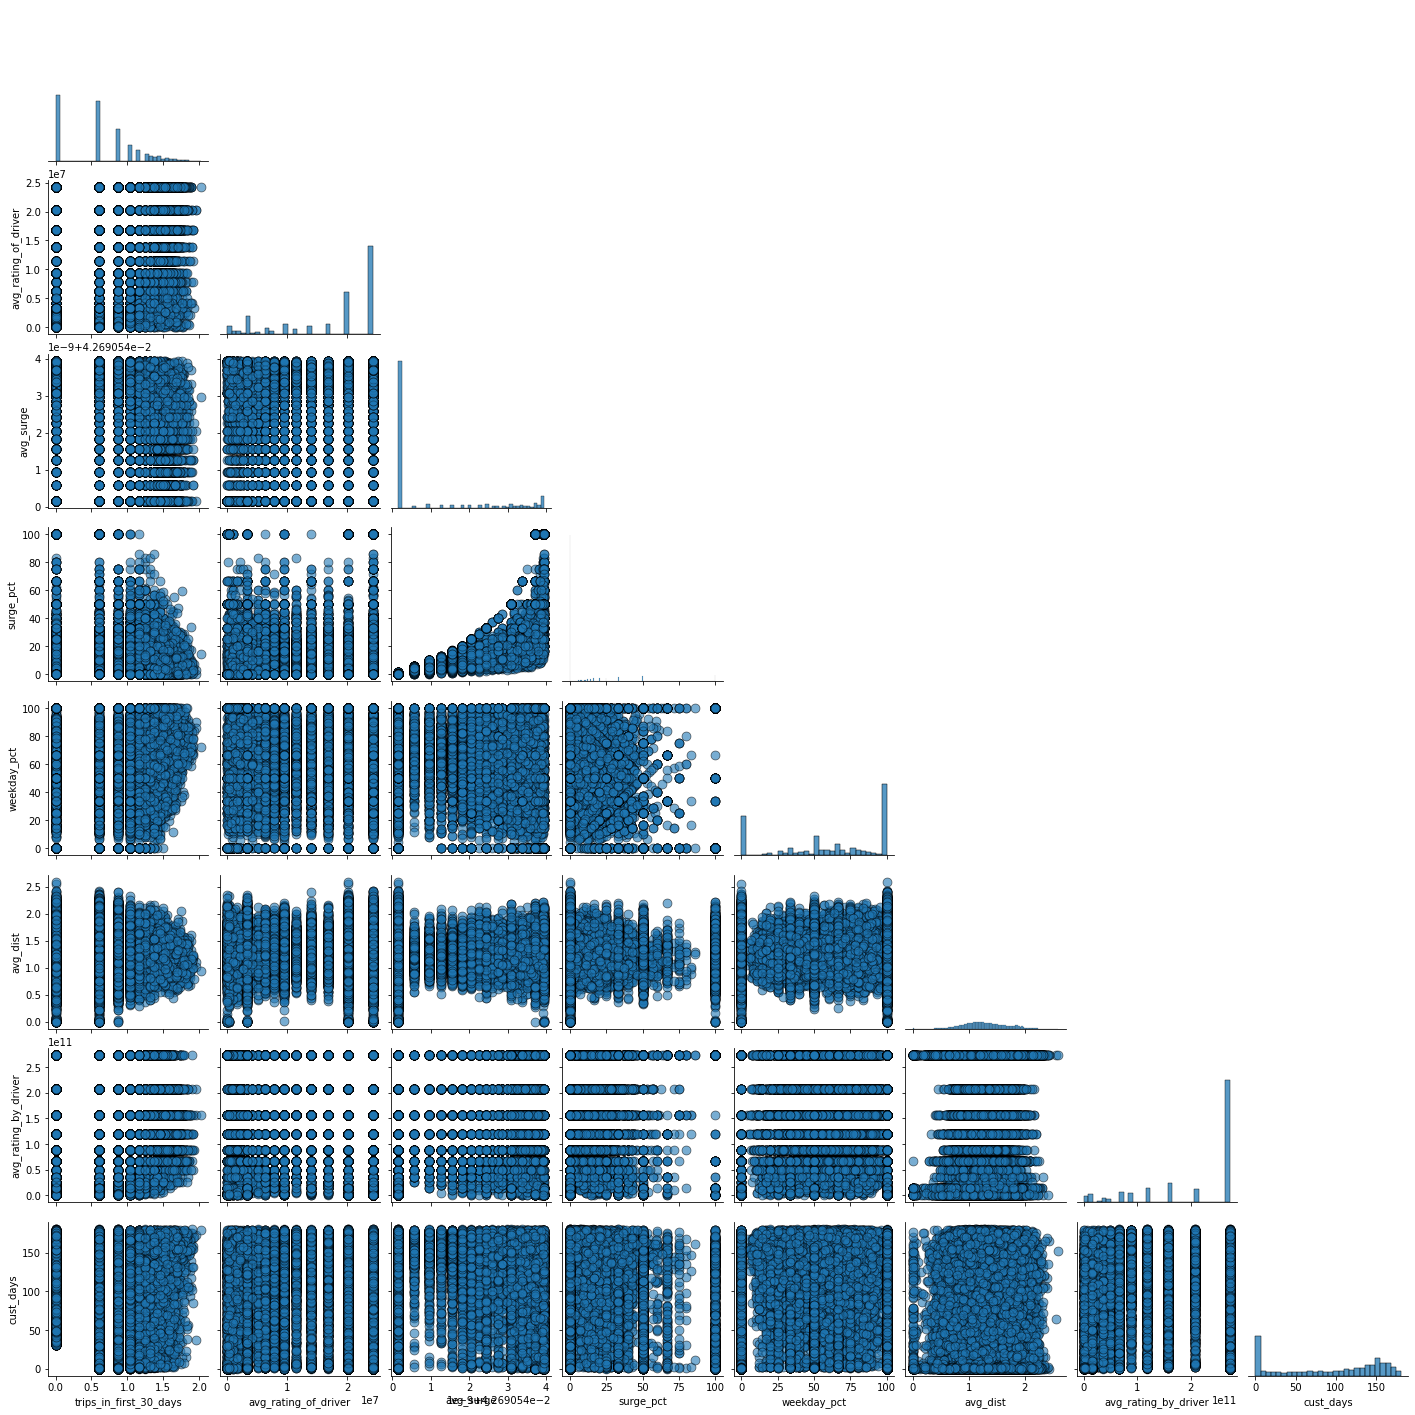

In [29]:
sns.pairplot(data = udc_df
            ,vars =  ['trips_in_first_30_days', 'avg_rating_of_driver','avg_surge','surge_pct','weekday_pct', 'avg_dist',
       'avg_rating_by_driver','cust_days']
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
                 ,corner=True)
plt.show()

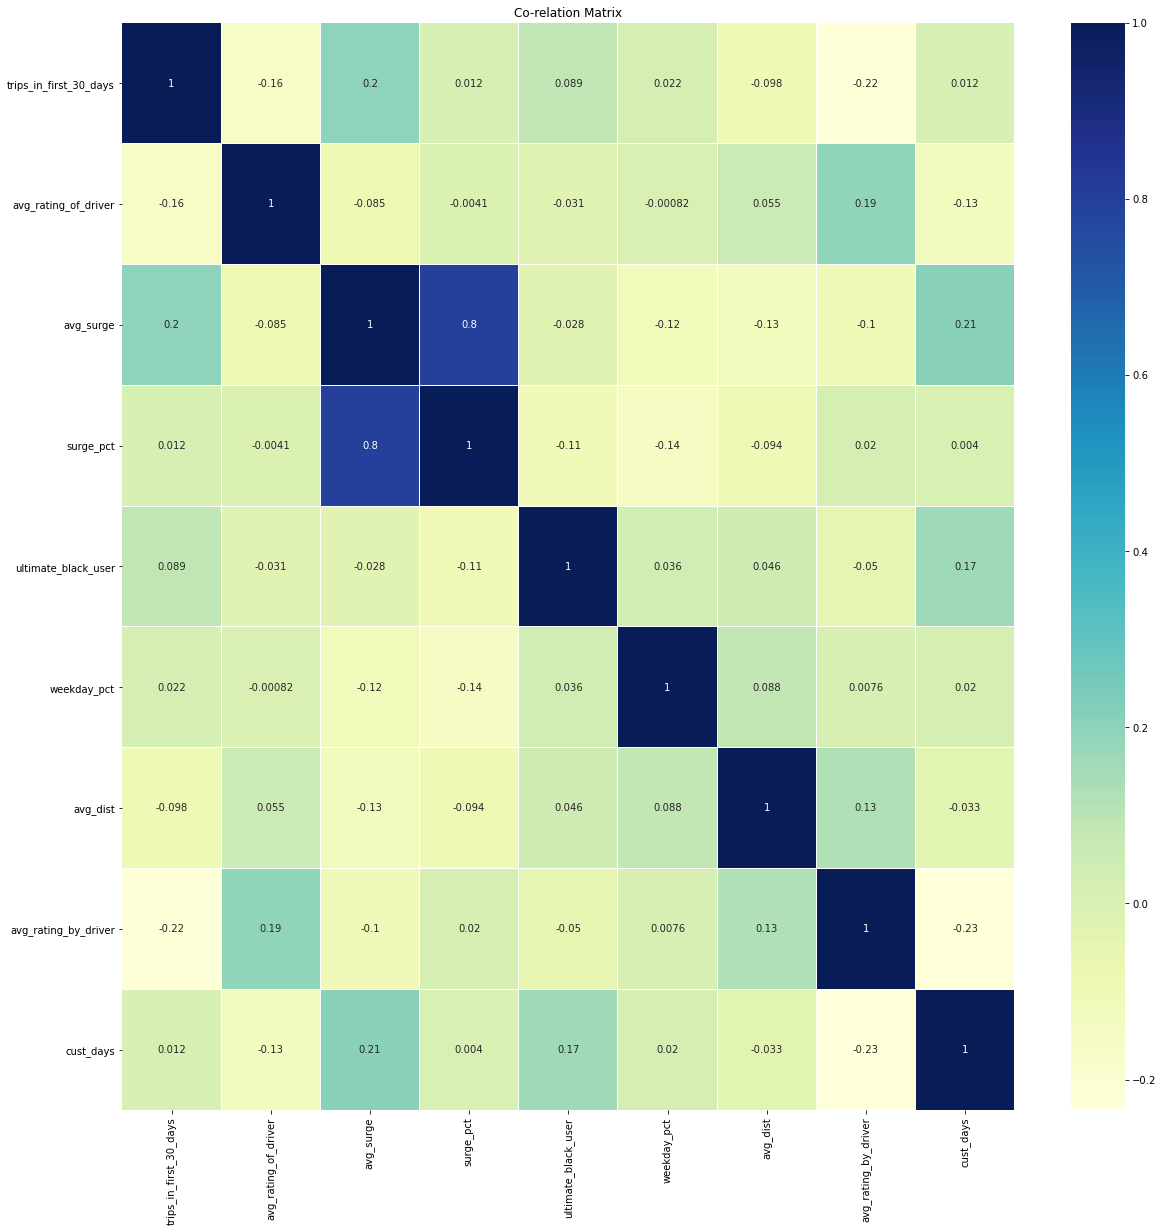

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(udc_df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.title('Co-relation Matrix')
plt.show()

avg_surge and surge_pct are highly co-related.

## Data Pre-Processing

In [31]:
#One hot encoding
for col in cat_var:
    udc_df = pd.concat([udc_df.drop(col, axis = 1),pd.get_dummies(udc_df[col],prefix = col)],axis = 1)

print(udc_df.columns)

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'cust_days',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone'],
      dtype='object')


In [32]:
#Scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
udc_df[continuous_var] = scale.fit_transform(udc_df[continuous_var])

In [33]:
#train test split
from sklearn.model_selection import train_test_split

X = udc_df.drop(['ultimate_black_user','surge_pct','signup_date','last_trip_date'],axis = 1)
y = udc_df['ultimate_black_user']

feature_lst = X.columns
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.30,random_state = 46)

## Modelling

In [34]:
score_df = pd.DataFrame(columns = ['Algorithm','Train_Score','Test_Score'])

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

def cross_validate(model,X,y):
    
    scr = []
    kfold = KFold(3, shuffle = True,random_state = 40)
    # enumerate splits
    for train, test in kfold.split(X):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        scr.append(precision_score(y_test, y_pred, average='macro'))
        
    print('Train Score: ',np.mean(scr))
    
    try:
        y_pred = model.predict(X_val)
        val_scr = precision_score(y_val, y_pred, average='macro')
        print('Test Score: ',val_scr)
        
    except:
        y_pred = model.predict(X_val.drop('customer_affinity_score',axis = 1))
        val_scr = precision_score(y_val, y_pred, average='macro')
        print('Test Score: ',val_scr)
    return np.mean(scr),val_scr, model

In [36]:
from sklearn.linear_model import LogisticRegression

algo = 'Logistic Regression'

LogReg = LogisticRegression()
tr_scr, tst_scr, LogReg = cross_validate(LogReg,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.614644045154293
Test Score:  0.6072778884363399


In [37]:
from sklearn.tree import DecisionTreeClassifier

algo = 'Decision Tree'

DTClf = DecisionTreeClassifier()
tr_scr, tst_scr, DTClf = cross_validate(DTClf,X_train,y_train)
score_df = score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.5338108580126387
Test Score:  0.5350059799800342


In [38]:
from sklearn.ensemble import RandomForestClassifier

algo = 'Random Forest Classifier'

RFClf = RandomForestClassifier()
tr_scr, tst_scr, RFClf = cross_validate(RFClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.5792902943588739
Test Score:  0.5778004058878671


In [39]:
from xgboost import XGBClassifier

algo = 'XG Boost'

XGBClf = XGBClassifier()
tr_scr, tst_scr, XGBClf = cross_validate(XGBClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

C:\Users\sanja\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score:  0.603457507473845
Test Score:  0.6003059049603268


In [40]:
from sklearn.svm import SVC

algo = 'SVM'

SVMClf = SVC(kernel = 'linear')
tr_scr, tst_scr, SVMClf = cross_validate(SVMClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Train Score:  0.6319912234248677
Test Score:  0.591264395595158


In [41]:
score_df

,Algorithm,Train_Score,Test_Score
0,Logistic Regression,0.614644,0.607278
1,Decision Tree,0.533811,0.535006
2,Random Forest Classifier,0.579290,0.577800
3,XG Boost,0.603458,0.600306
4,SVM,0.631991,0.591264


In [42]:
features = list(X.columns)
coef = SVMClf.coef_[0]

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.00
avg_rating_of_driver :  0.00
avg_surge :  -0.00
weekday_pct :  0.00
avg_dist :  -0.00
avg_rating_by_driver :  -0.00
cust_days :  0.00
city_Astapor :  0.00
city_King's Landing :  -0.00
city_Winterfell :  -0.00
phone_Android :  -2.00
phone_iPhone :  -2.00


Looking at SVM's coefficient phone os time seems to be an important parameter. But this model might be overfitting as Test score is lower.

In [43]:
features = list(X.columns)
coef = LogReg.coef_[0]

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.24
avg_rating_of_driver :  -0.00
avg_surge :  -0.21
weekday_pct :  0.04
avg_dist :  0.12
avg_rating_by_driver :  -0.01
cust_days :  0.38
city_Astapor :  0.28
city_King's Landing :  0.13
city_Winterfell :  -0.03
phone_Android :  -1.13
phone_iPhone :  -0.95


Again Phone seems to be an important parameter. 'cust_days' is another important feature, it's a new feature stating how old the customer is. City is also an important feature. 'trips_in_first_30_days' number of trips in past 30 days.
'avg_surge' is also an important feature.

In [44]:
features = list(X.columns)
coef = DTClf.feature_importances_

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.06
avg_rating_of_driver :  0.08
avg_surge :  0.06
weekday_pct :  0.11
avg_dist :  0.34
avg_rating_by_driver :  0.07
cust_days :  0.22
city_Astapor :  0.01
city_King's Landing :  0.01
city_Winterfell :  0.01
phone_Android :  0.02
phone_iPhone :  0.02


In [45]:
features = list(X.columns)
coef = RFClf.feature_importances_

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.08
avg_rating_of_driver :  0.09
avg_surge :  0.07
weekday_pct :  0.10
avg_dist :  0.31
avg_rating_by_driver :  0.06
cust_days :  0.24
city_Astapor :  0.01
city_King's Landing :  0.01
city_Winterfell :  0.01
phone_Android :  0.01
phone_iPhone :  0.01


In [46]:
features = list(X.columns)
coef = XGBClf.feature_importances_

for i,j in zip(features,coef):
    print(i,': ',format(j,'.2f'))

trips_in_first_30_days :  0.09
avg_rating_of_driver :  0.06
avg_surge :  0.09
weekday_pct :  0.07
avg_dist :  0.07
avg_rating_by_driver :  0.07
cust_days :  0.12
city_Astapor :  0.11
city_King's Landing :  0.07
city_Winterfell :  0.07
phone_Android :  0.06
phone_iPhone :  0.12


cust_days, phone, city seem to be impotant criterias.

Also, we need more features such as customer demography, job, age etc.

And customer activity in past few weeks can also help.

And more data is also required.